In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd

path = '/content/drive/Shareddrives/Tugas Project SMKDEV Scholarship 2023/Kelompok 5/Netflix Userbase.csv'
df = pd.read_csv(path)
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
df.duplicated().sum() #Checking whether the dataset have duplicated values

0

In [ ]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [ ]:
df["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [ ]:
df = df.drop("Plan Duration", axis = 1) #Removing Plan Duration attribute as it only have 1 month in all columns

In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date']) #Changing the datatype
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date']) #Changing the datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


In [ ]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
dtype: int64

In [ ]:
df.shape

(2500, 9)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sub_cnts = df['Subscription Type'].value_counts()
px.pie(sub_cnts,
       names=sub_cnts.index,
       values=sub_cnts.values,
       title='Distribution of Subscription Types',
       color_discrete_sequence=px.colors.sequential.RdBu,
       hole = 0.5)

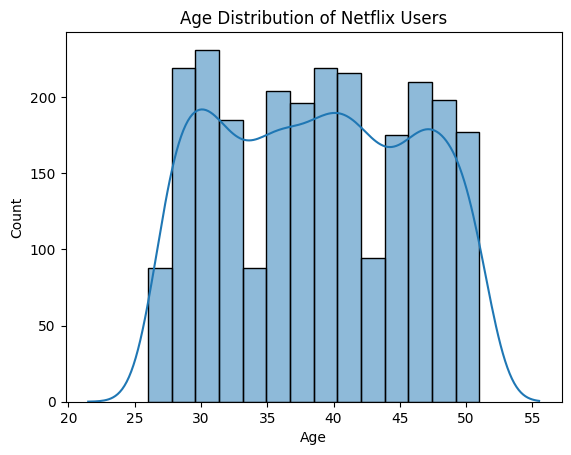

In [ ]:
import seaborn as sns

sns.histplot(df['Age'], kde=True,
             kde_kws=dict(cut=3))
plt.title('Age Distribution of Netflix Users')
plt.show()

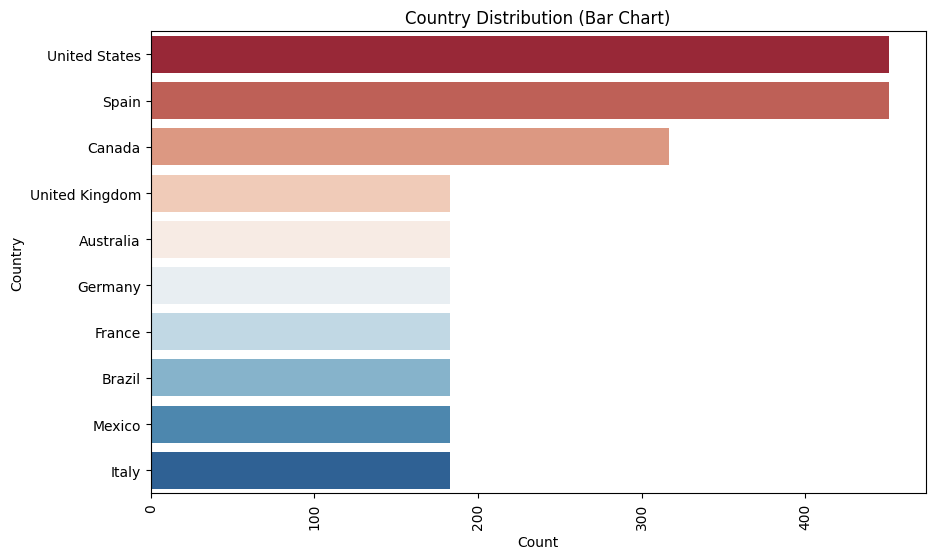

In [ ]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='RdBu')
plt.title('Country Distribution (Bar Chart)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
gender_counts = df['Gender'].value_counts()
px.pie(gender_counts, names=gender_counts.index,
       values=gender_counts.values,
       title='Gender Distribution',
       hole=0.5,
       color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.box(df, x="Subscription Type", y="Age",
       color="Gender", notched=True,
       color_discrete_sequence=px.colors.sequential.Rainbow)

In [ ]:
fig = px.sunburst(df, path=["Country", "Subscription Type"],
                  values="Monthly Revenue",
                  title="Sunburst Chart with Text Labels")
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

In [ ]:
px.choropleth(df, locations="Country",
              locationmode="country names",
              color="Monthly Revenue",
              title="Choropleth Map of Monthly Revenue by Country")

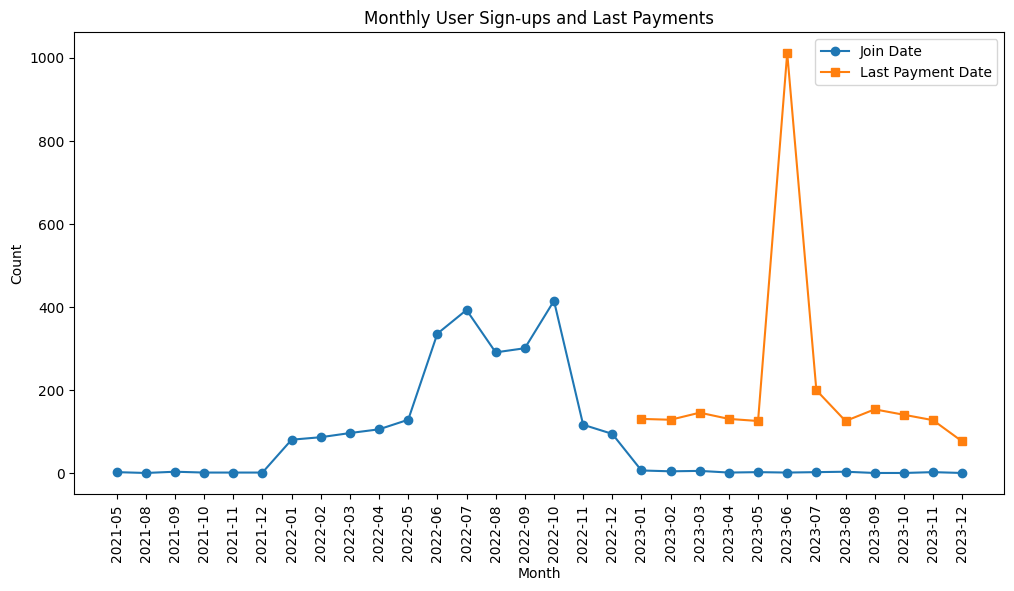

In [ ]:
# Extract the year and month as a string for plotting
df['Join Month'] = df['Join Date'].dt.strftime('%Y-%m')
df['Last Payment Month'] = df['Last Payment Date'].dt.strftime('%Y-%m')

monthly_join_counts = df['Join Month'].value_counts().sort_index()
monthly_payment_counts = df['Last Payment Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_join_counts.index, monthly_join_counts.values,
         label='Join Date', marker='o')
plt.plot(monthly_payment_counts.index, monthly_payment_counts.values,
         label='Last Payment Date', marker='s')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly User Sign-ups and Last Payments')
plt.xticks(rotation="vertical")
plt.legend()
plt.show()